Two-pane animation showing, on the left, positions of the Sun and selected planets in the night sky. The right panel shows line-of-sight from Earth to other planets, illustrating the cause of retrograde motion and annotating the beginning and ending dates of retrograde motion and the date of opposition with text. Retrograde motion is illustrated with a red line.

I wrote this script in Carnets app on my iPad ( https://apps.apple.com/us/app/carnets/id1450994949 ) and in Anaconda on my Mac ( https://www.anaconda.com ). There's a quirk in the interpreter (in both development environments) that causes the code to fail with error message `AttributeError: 'NoneType' object has no attribute 'remove_callback'`. I just ignore it and it runs the second time.

This script uses Skyfield api ( https://rhodesmill.org/skyfield/planets.html ).

Although I probably can't help you debug your program I would love to hear if you use this animation (or derivative) in your astronomy lessons or observations.

Good luck,

Stephen Shadle 🌌

swshadle@gmail.com

# Version Control

Skyfield Sky View & Retrograde with Events 1: Use add_gridspec to control plot layout within the figure

Skyfield Sky View & Retrograde with Events: Name change reflects merger of this script with Skyfield Retrograde Inner Planets with Events, the single-panel script that includes event notation text to the right of the animation.

Skyfield Retrograde Named Stars w Inner Planets: original version.

In [11]:
from skyfield.api import Star, load, Topos
from skyfield.data import hipparcos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter, PillowWriter
import matplotlib.animation as animations
from datetime import datetime
%matplotlib notebook

<IPython.core.display.Javascript object>


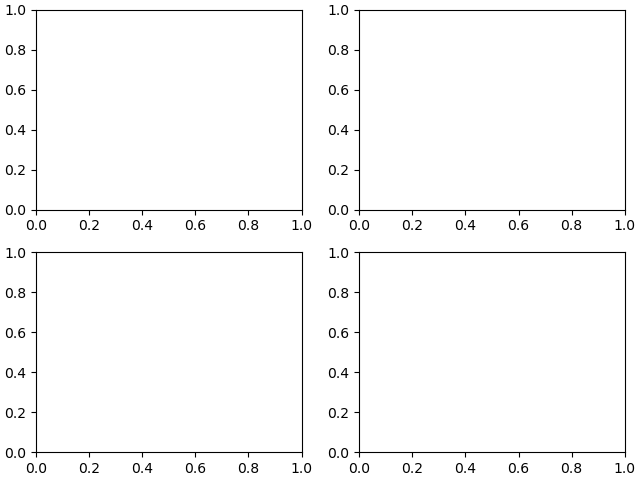

In [12]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)

<IPython.core.display.Javascript object>


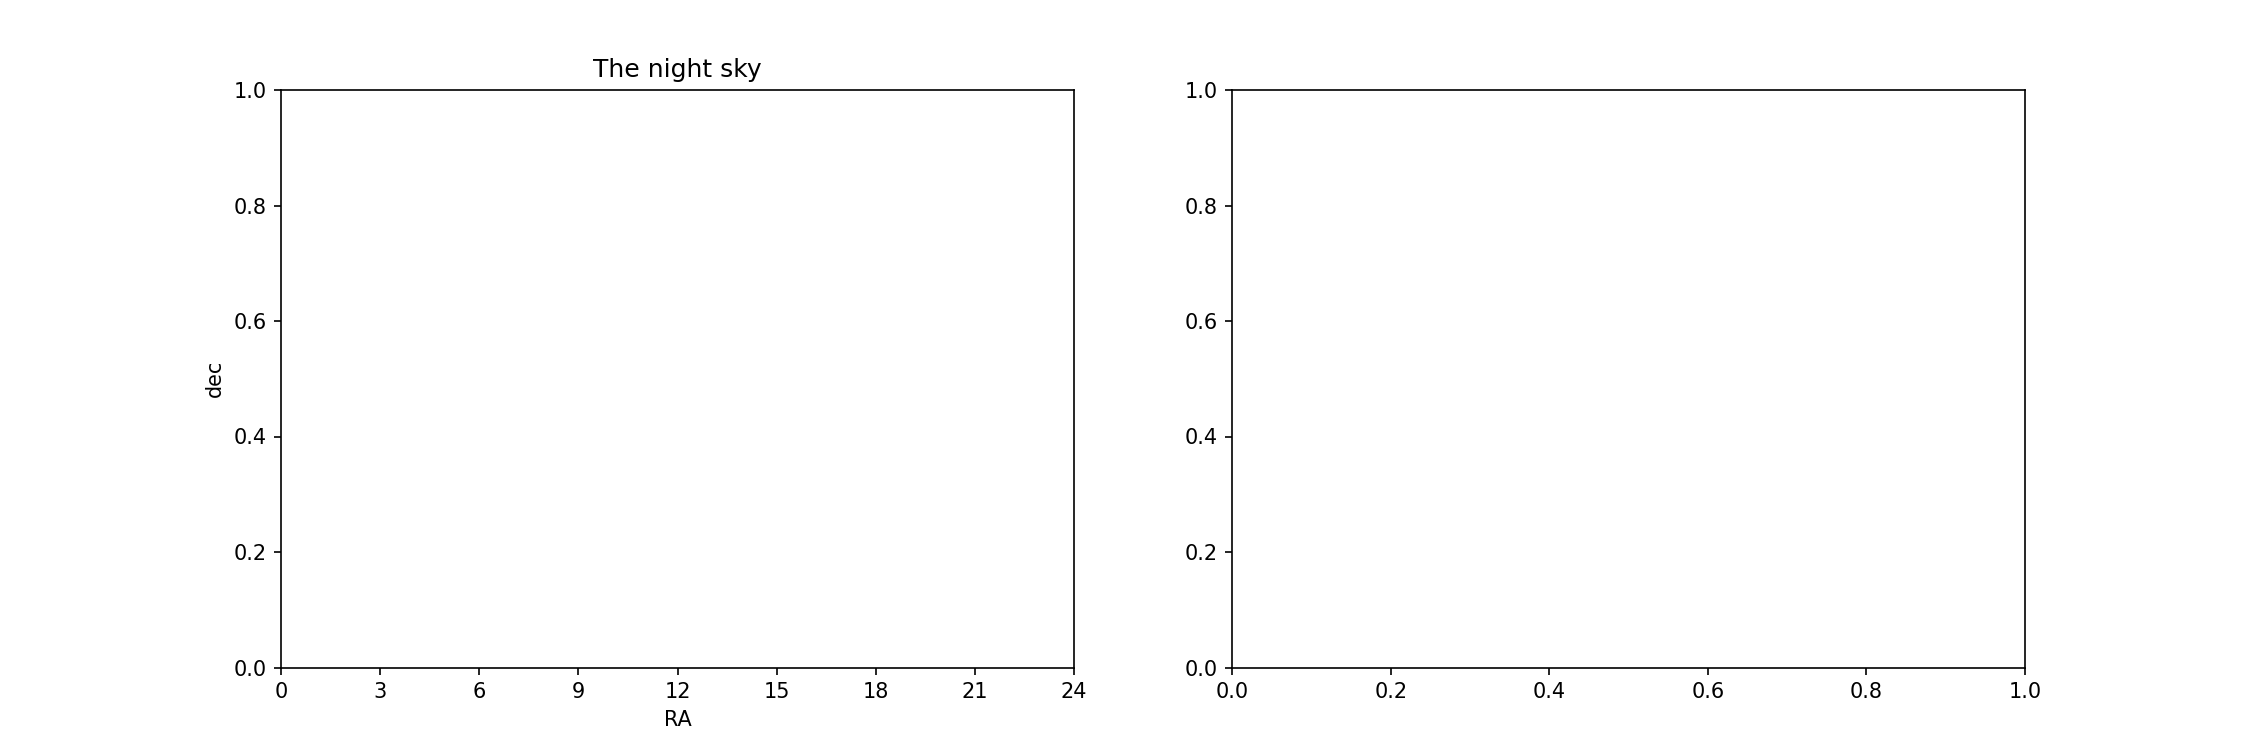

In [28]:
fig = plt.figure(figsize=(15, 5), dpi=150)

In [19]:
import matplotlib.gridspec as gridspec

<IPython.core.display.Javascript object>


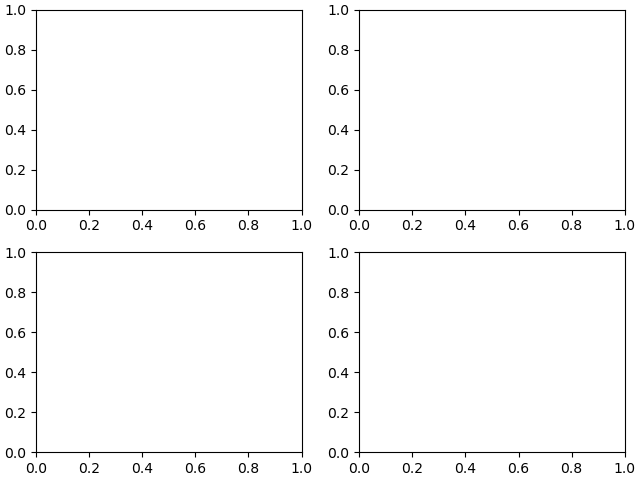

In [24]:
fig2 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 1])

In [ ]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(3,3)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]')
f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')
f3_ax5 = fig3.add_subplot(gs[-1, -2])
f3_ax5.set_title('gs[-1, -2]')

<IPython.core.display.Javascript object>


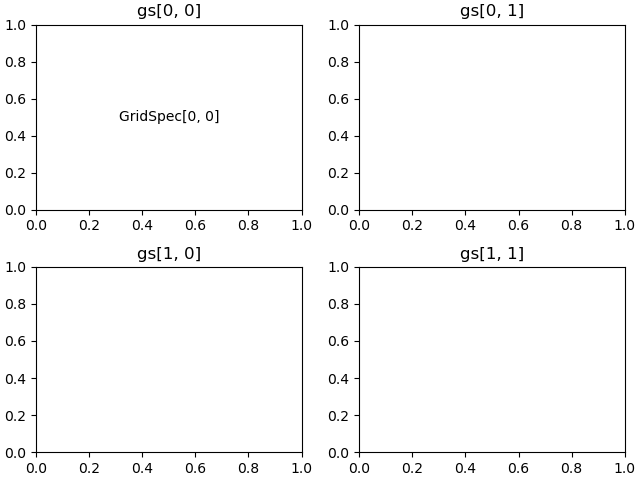

In [33]:
fig4 = plt.figure(constrained_layout=True)
gs = fig4.add_gridspec(ncols=2, nrows=2)
anno_opts = dict(xy=(0.5,0.5), xycoords='axes fraction', va='center', ha='center')

f4_ax1 = fig4.add_subplot(gs[0, 0])
f4_ax1.annotate('GridSpec[0, 0]', **anno_opts)

f4_ax1.set_title('gs[0, 0]')
f4_ax2 = fig4.add_subplot(gs[0, 1]).set_title('gs[0, 1]')
f4_ax3 = fig4.add_subplot(gs[1, 0]).set_title('gs[1, 0]')
f4_ax4 = fig4.add_subplot(gs[1, 1]).set_title('gs[1, 1]')

<IPython.core.display.Javascript object>


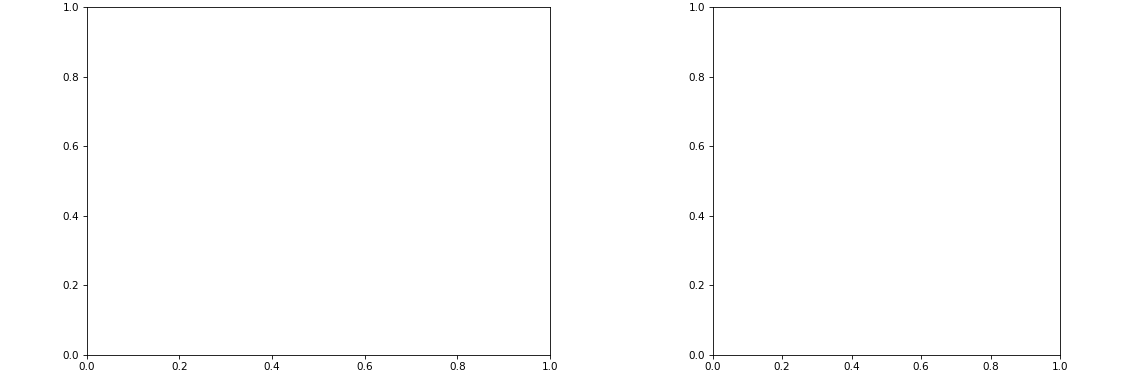

In [109]:
fig5 = plt.figure(constrained_layout=True, figsize=(15, 5), dpi=75)
widths = [4, 3]
heights = [1]
gs = fig5.add_gridspec(nrows=1, ncols=2,
                       width_ratios=widths,
                       height_ratios=heights,
                       left=-0.55,
                       right=0.95,
                       top=0.90,
                       bottom=0.10,
                       wspace=0.00,
                      )
f5_ax1 = fig5.add_subplot(gs[0, 0])
f5_ax2 = fig5.add_subplot(gs[0, 1])
f5_ax1.set_aspect(3/4)
f5_ax2.set_aspect('equal')
# f5_ax3 = fig5.add_subplot(gs[-1, -1])

<IPython.core.display.Javascript object>


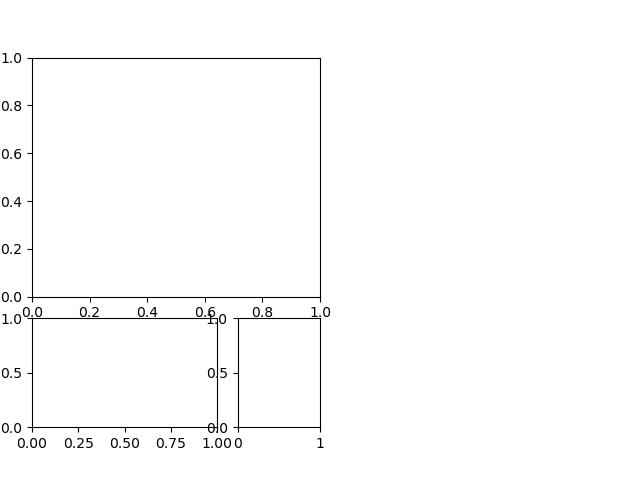

In [58]:
fig8 = plt.figure(constrained_layout=False)
gs = fig8.add_gridspec(nrows=3, ncols=3,
                       left=0.05,
                       right=0.5,
                       wspace=0.25
                      )
f8_ax1 = fig8.add_subplot(gs[:-1, :])
f8_ax2 = fig8.add_subplot(gs[-1, :-1])
f8_ax3 = fig8.add_subplot(gs[-1, -1])

<IPython.core.display.Javascript object>


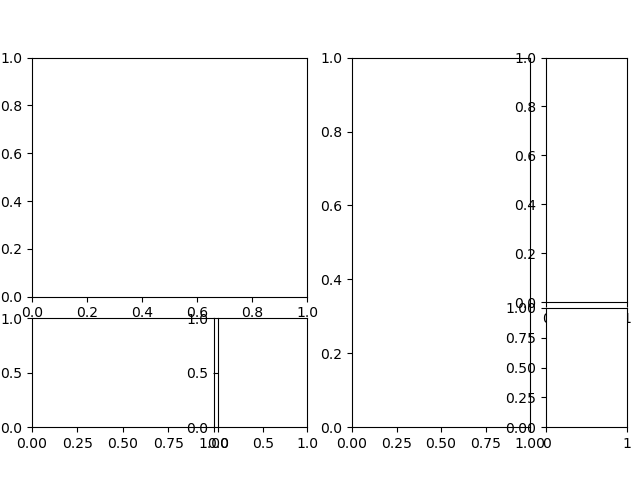

In [52]:
fig9 = plt.figure(constrained_layout=False)
gs1 = fig9.add_gridspec(nrows=3, ncols=3,
                        left=0.05,
                        right=0.48,
                        wspace=0.05
                        )
f9_ax1 = fig9.add_subplot(gs1[:-1, :])
f9_ax2 = fig9.add_subplot(gs1[-1, :-1])
f9_ax3 = fig9.add_subplot(gs1[-1, -1])

gs2 = fig9.add_gridspec(nrows=3, ncols=3,
                        left=0.55,
                        right=0.98,
                        hspace=0.05
                        )
f9_ax4 = fig9.add_subplot(gs2[:, :-1])
f9_ax5 = fig9.add_subplot(gs2[:-1, -1])
f9_ax6 = fig9.add_subplot(gs2[-1, -1])

<IPython.core.display.Javascript object>


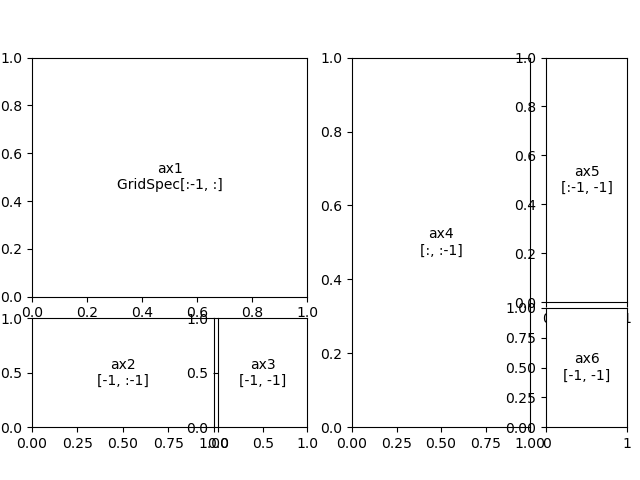

In [69]:
fig10 = plt.figure(constrained_layout=False)
gs1 = fig10.add_gridspec(nrows=3, ncols=3,
                        left=0.05,
                        right=0.48,
                        wspace=0.05
                        )

anno_opts = dict(xy=(0.5,0.5), xycoords='axes fraction', va='center', ha='center')

f10_ax1 = fig10.add_subplot(gs1[:-1, :]).annotate('ax1\nGridSpec[:-1, :]', **anno_opts)
f10_ax2 = fig10.add_subplot(gs1[2, :-1]).annotate('ax2\n[-1, :-1]', **anno_opts)
f10_ax3 = fig10.add_subplot(gs1[-1, -1]).annotate('ax3\n[-1, -1]', **anno_opts)

gs2 = fig10.add_gridspec(nrows=3, ncols=3,
                        left=0.55,
                        right=0.98,
                        hspace=0.05
                        )
f10_ax4 = fig10.add_subplot(gs2[:, :-1]).annotate('ax4\n[:, :-1]', **anno_opts)
f10_ax5 = fig10.add_subplot(gs2[:-1, -1]).annotate('ax5\n[:-1, -1]', **anno_opts)
f10_ax6 = fig10.add_subplot(gs2[-1, -1]).annotate('ax6\n[-1, -1]', **anno_opts)

<IPython.core.display.Javascript object>


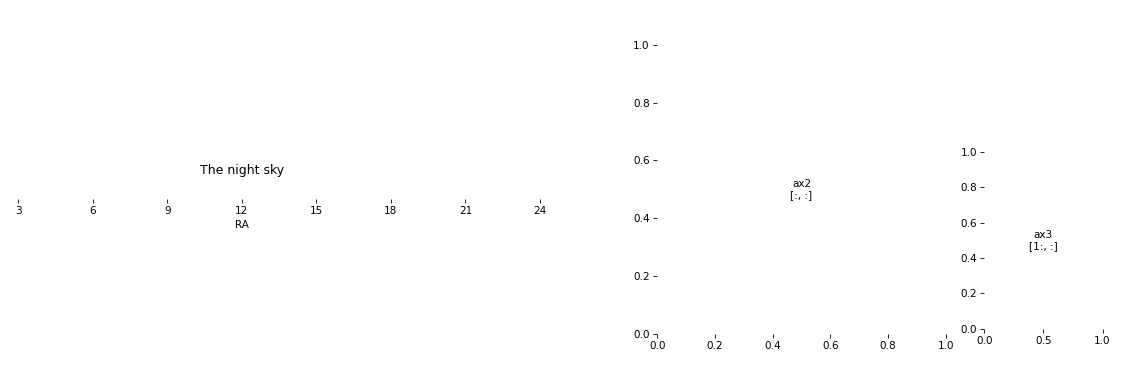

Text(0.5, 0.5, 'ax3\n[1:, :]')

In [131]:
# # create the figure on the left: the night sky
# ax2d = fig.add_subplot(121, frameon=False, title='The night sky',
# #                        xlim=(0.0, 1.0),
#                        xlabel="RA", 
# #                        ylim=(-180.0, 180.0),
# #                        ylim=(0.0, 1.0),
#                        ylabel="dec",
# #                        xticks=[0, 45, 90, 135, 180, 225, 270, 315, 360],
# #                        xticks=[0, 3, 6, 9, 12, 15, 18, 21, 24],
#                        xticks=[24, 21, 18, 15, 12, 9, 6, 3, 0],
# #                        xticklabels=['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N'],
#                       )

# # create the figure on the right: the overhead view of the solar system
# ax3d = fig.add_subplot(122, frameon=False)

fig11 = plt.figure(constrained_layout=False, figsize=(15, 5), dpi=75)
anno_opts = dict(xy=(0.5,0.5), xycoords='axes fraction', va='center', ha='center')
gs1 = fig11.add_gridspec(nrows=1, ncols=1,
                            left=-0.05,
                            right=0.48,
                            wspace=0.05
                         )

f11_ax1 = fig11.add_subplot(gs1[0, 0], frameon=False, title='The night sky',
                       xlabel="RA", 
                       ylabel="dec",
                       xticks=[24, 21, 18, 15, 12, 9, 6, 3, 0])
f11_ax1.set_aspect(3/4)
# f11_ax1.annotate('ax1\nGridSpec[:, :]', **anno_opts)

gs2 = fig11.add_gridspec(nrows=1, ncols=1,
                            left=0.55,
                            right=0.875,
                            wspace=0.05
                         )

f11_ax2 = fig11.add_subplot(gs2[0, 0], frameon=False)
f11_ax2.set_aspect('equal')
f11_ax2.annotate('ax2\n[:, :]', **anno_opts)

gs3 = fig11.add_gridspec(nrows=3, ncols=1,
                            left=0.875,
                            right=0.98,
                            wspace=0.05
                         )
f11_ax3 = fig11.add_subplot(gs3[1:, :], frameon=False)
f11_ax3.set_aspect(3/2)
f11_ax3.annotate('ax3\n[1:, :]', **anno_opts)

<IPython.core.display.Javascript object>


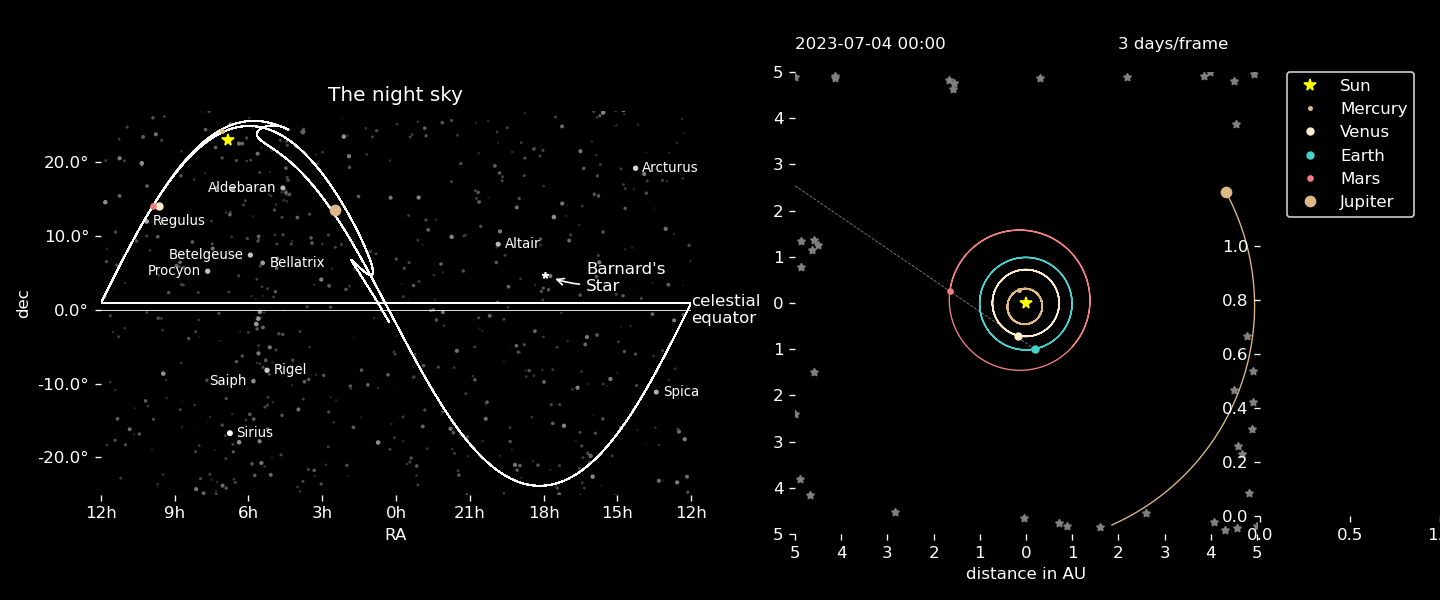

Displaying 26304 data points for Mars starting at 0.28 hours RA and -1.6 degrees
Barnard's star is at RA 18.0h dec 4.8° at distance 4e+05 AU
Before filtering, there are 118218 stars
After filtering for NaN, there are 117955 stars
After filtering for magnitude, there are 8870 stars
Sirius is at RA 6.8h (101.284°) dec -16.723° at distance 8.6 LY
OFF PLOT:Canopus at RA 6.4h (95.988°) dec -52.696° at distance 312.7 LY
Arcturus is at RA 14.3h (213.909°) dec 19.171° at distance 36.7 LY
OFF PLOT:Rigel Kent at RA 14.7h (219.859°) dec -60.831° at distance 4.4 LY
OFF PLOT:Vega at RA 18.6h (279.236°) dec 38.785° at distance 25.3 LY
OFF PLOT:Capella at RA 5.3h (79.173°) dec 45.996° at distance 42.2 LY
Rigel is at RA 5.2h (78.634°) dec -8.202° at distance 772.9 LY
Procyon is at RA 7.7h (114.821°) dec 5.219° at distance 11.4 LY
Betelgeuse is at RA 5.9h (88.793°) dec 7.407° at distance 427.5 LY
OFF PLOT:Achernar at RA 1.6h (24.429°) dec -57.237° at distance 143.8 LY
Altair is at RA 19.8h (297.699°) d

/Users/Stavi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


FFMpegWriter is available
35 seconds elapsed


In [21]:
# use "%pip install" to load skyfield api once then comment the line out:
###### %pip install skyfield
from skyfield.api import Star, load, Topos
from skyfield.data import hipparcos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter, PillowWriter
import matplotlib.animation as animations
from datetime import datetime
%matplotlib notebook

KMperLY = 9460528405000 # km per ly
start_time = datetime.now()

# with plt.xkcd(): # uncomment (and indent the rest of the script) if you want the figure to be in xkcd style (see https://matplotlib.org/xkcd/examples/showcase/xkcd.html)

# constructor class for making planets
class planets:
    def __init__(self, name, marker=None, color=None, markersize=None, trailmax=None):
        self.name       = name
        self.marker     = marker if marker is not None else 'o'
        self.color      = color if color is not None else 'k'
        self.markersize = markersize if markersize is not None else 1

# creating list
plist = []

# appending instances to list
plist.append(planets(name='Sun',     color='yellow',          markersize=7, marker='*'))
plist.append(planets(name='Mercury', color='burlywood',       markersize=2))
plist.append(planets(name='Venus',   color='blanchedalmond',  markersize=4))
plist.append(planets(name='Earth',   color='mediumturquoise', markersize=4))
plist.append(planets(name='Mars',    color='lightcoral',      markersize=3))
plist.append(planets(name='Jupiter', color='burlywood',       markersize=6))
# plist.append(planets(name='Saturn',  color='seashell',        markersize=5))
# plist.append(planets(name='Uranus',  color='paleturquoise',   markersize=5))
# plist.append(planets(name='Neptune', color='royalblue',       markersize=5))
# plist.append(planets(name='Pluto',   color='lightsalmon',     markersize=2))

# load skyfield ephemeris table from local directory (see https://rhodesmill.org/skyfield/planets.html)
eph = load('de421.bsp') # ephemeris table de421.bsp is only valid through 2053 Oct 9 (Julian date 2471184.5)
sun     = eph[plist[0].name]
mercury = eph[plist[1].name]
venus   = eph[plist[2].name]
earth   = eph[plist[3].name]
# moon    = eph[names[4]]
mars    = eph[plist[4].name]
jupiter = eph['Jupiter barycenter']
# saturn  = eph['Saturn barycenter']
# urаnus  = eph['Uranus barycenter']
# neptune = eph['Neptune barycenter']
# pluto   = eph['Pluto barycenter']

ts = load.timescale()

hours = (3*365+1)*24 # how long the animation should run (number of hours of data from ephemeris table)

interval = 3*24      # number of hours to skip forward for each frame of the animation
dpi = 120            # dots per inch for the image
hw = 5.0             # height and width of the solar system plot (ax2), in AU. 3.0 works for the inner planets through mars. 5 for Jupiter.

numremoved = 0

start_y = start_time.year  # 2020 (use numbers here to select a fixed start date rather than today's date)
start_m = start_time.month # 5
start_d = start_time.day   # 1

t = ts.utc(start_y,start_m,start_d,range(hours))
while len(t)>1 and t[-1].tt>2471184.5:
    t=t[:-1]
    numremoved += 1

if numremoved:
    print(f'removed {numremoved} frames')
    hours -= numremoved
    t  = ts.utc(start_y,start_m,start_d,range(hours))

# assert an error if there is no remaining valid data
assert t[-1].tt<2471184.5, 'Dates are out of range'
assert hours>0, f'too few hours selected: {hours}'

sun_p     = eph[plist[0].name].at(t).ecliptic_position().au
mercury_p = eph[plist[1].name].at(t).ecliptic_position().au
venus_p   = eph[plist[2].name].at(t).ecliptic_position().au
earth_p   = eph[plist[3].name].at(t).ecliptic_position().au
# moon_p    = moon.at(t).ecliptic_position().au
mars_p    = eph[plist[4].name].at(t).ecliptic_position().au
jupiter_p = jupiter.at(t).ecliptic_position().au
# saturn_p  = saturn.at(t).ecliptic_position().au
# uranus_p  = urаnus.at(t).ecliptic_position().au
# neptune_p = neptune.at(t).ecliptic_position().au
# pluto_p   = pluto.at(t).ecliptic_position().au

ps = [sun_p,
      mercury_p,
      venus_p,
      earth_p,
#       moon_p,
      mars_p,
      jupiter_p,
#       saturn_p,
#       uranus_p,
#       neptune_p,
#       pluto_p,
     ]

maxsize = [-hw, hw]

# fig = plt.figure(figsize=(6.6, 5), dpi=dpi)
# fig = plt.figure(figsize=(11, 5), dpi=dpi)
# fig = plt.figure(figsize=(15, 5), dpi=dpi)
fig = plt.figure(constrained_layout=False, figsize=(12, 5), dpi=dpi)
# anno_opts = dict(xy=(0.5,0.5), xycoords='axes fraction', va='center', ha='center')

# create the figure on the left: the night sky
gs1 = fig.add_gridspec(nrows=1, ncols=1,
                       left=0.07,
                       right=0.48,
                       wspace=0.05
                       )

ax1 = fig.add_subplot(gs1[0, 0], frameon=False, title='The night sky',
                      xlabel="RA",
                      ylabel="dec",
                      xticks=[24, 21, 18, 15, 12, 9, 6, 3, 0])
ax1.set_aspect(3/10)
# f11_ax1.annotate('ax1\nGridSpec[0, 0]', **anno_opts)

# create the middle figure: the overhead view of the solar system
gs2 = fig.add_gridspec(nrows=1, ncols=1,
                       left=0.55,
                       right=0.875,
                       wspace=0.05
                       )

ax2 = fig.add_subplot(gs2[0, 0], frameon=False)
ax2.set_aspect('equal')
# ax2.annotate('ax2\n[0, 0]', **anno_opts)

# create the figure on the right: a space for listing events
gs3 = fig.add_gridspec(nrows=3, ncols=1,
                       left=0.875,
                       right=1,
                       hspace=0.05
                       )

ax3 = fig.add_subplot(gs3[1:, :], frameon=False)
ax3.set_aspect(3/2)
# ax3.annotate('ax3\n[1:, :]', **anno_opts)

# # create the figure on the left: the night sky
# ax2d = fig.add_subplot(121, frameon=False, title='The night sky',
# #                        xlim=(0.0, 1.0),
#                        xlabel="RA", 
# #                        ylim=(-180.0, 180.0),
# #                        ylim=(0.0, 1.0),
#                        ylabel="dec",
# #                        xticks=[0, 45, 90, 135, 180, 225, 270, 315, 360],
# #                        xticks=[0, 3, 6, 9, 12, 15, 18, 21, 24],
#                        xticks=[24, 21, 18, 15, 12, 9, 6, 3, 0],
# #                        xticklabels=['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N'],
#                       )

# # create the figure on the right: the overhead view of the solar system
# ax3d = fig.add_subplot(122, frameon=False
# #                        projection ='3d',
#                       )

# plt.subplots_adjust(left=-0.25, right=1) # moves the plot to the left to reduce the margin between plots


# ax2d.set_xticklabels=(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N'])

# plt.tight_layout(
# #                  pad=4.2,
# #                  pad=3.2,
#                  w_pad=1.5,
#                  h_pad=3.2
#                 )
                       
# ax2d.set_xticks=([0, 45, 90, 135, 180, 225, 270, 315, 360])

# some background stars from https://github.com/zingale/astro_animations/blob/master/solar_system_motion/retrograde/retrograde.py
import random
N = 10
xpos = []
ypos = []
starbox = [hw-0.5, hw]

for s in range(N):
    # right
    xpos.append(random.uniform( starbox[0], starbox[1]))
    ypos.append(random.uniform(-starbox[1], starbox[1]))

    # top
    xpos.append(random.uniform(-starbox[1], starbox[1]))
    ypos.append(random.uniform( starbox[0], starbox[1]))

    # left
    xpos.append(random.uniform(-starbox[0],-starbox[1]))
    ypos.append(random.uniform(-starbox[1], starbox[1]))

    # bottom
    xpos.append(random.uniform(-starbox[1], starbox[1]))
    ypos.append(random.uniform(-starbox[0],-starbox[1]))

# draw some random background stars
# for s in range(N):
#     plt.scatter([xpos[s]], [ypos[s]], s=20, marker=(5,1), color="grey")

# plt.scatter(xpos, ypos, s=20, marker=(5,1), color="grey")
ax2.scatter(xpos, ypos, s=20, marker=(5,1), color="grey")

# plt.show()

dots   = []
trails = []
marstrail = []
# suntrail = []
# lines  = []

for i,p in enumerate(ps):
    x, y, z = p # z is ignored in 2D plots

#     newdot, = plt.plot([x[0]],
    newdot, = ax2.plot([x[0]],
                       [y[0]],
#                        [z[0]],
                       marker=plist[i].marker,
                       ms=plist[i].markersize,
                       label=plist[i].name,
                       color=plist[i].color,
                      linestyle = 'None',
                      )
    dots.append(newdot)
    
#     newtrail, = plt.plot(x[:1],
    newtrail, = ax2.plot(x[:1],
                         y[:1],
#                          z[:1],
                         color=plist[i].color,
                         linewidth=0.01,
#                          marker='.',
#                          ms=0.01,
#                          linestyle = 'None',
                        )

    trails.append(newtrail)
    
xmercury, ymercury, zmercury = ps[1]
xvenus, yvenus, zvenus       = ps[2]
xearth, yearth, zearth       = ps[3]
xmars, ymars, zmars          = ps[4]

#     slope = (sol[1].y[n] - sol[0].y[n])/(sol[1].x[n] - sol[0].x[n])
slope = (yearth[0] - ymars[0])/(xearth[0] - xmars[0])

# maxsize = [-hw*1.05, hw*1.05]

if xearth[0]>xmars[0]:
    xpt = -hw
else:
    xpt = hw
    

#     ypt = sol[0].y[n] + slope*(xpt - sol[0].x[n])
ypt = yearth[0] + slope*(xpt - xearth[0])

#     plt.plot([sol[0].x[n], xpt], [sol[0].y[n], ypt], "b--")

# newline, = plt.plot([xearth[0], xpt], [yearth[0], ypt], "--")

# lines.append(newline)

eclat, eclon, ecd = earth.at(t).observe(mars).ecliptic_latlon()
eclondel = eclon.radians[1:] - eclon.radians[:-1]

prograde = eclondel > 0.

marslinecolor = ['grey' if prograde[i] else 'orangered' for i in range(len(prograde))]

# pLine,  = plt.plot([xearth[0], xpt], [yearth[0], ypt], "--", color='lightgreen', linewidth=0.5) # line connecting the sun and planet

# pLine,  = plt.plot([xearth[0], xpt], [yearth[0], ypt], "--",
pLine,  = ax2.plot([xearth[0], xpt], [yearth[0], ypt], "--",
#                    color=marslinecolor[0],
                   linewidth=0.5) # line connecting the sun and planet

pLine.set_color(marslinecolor[0])

katy = earth + Topos('29.785786 N', '95.824394 W')
apparent_sun  = katy.at(t).observe(sun)
apparent_merc = katy.at(t).observe(mercury)
apparent_vens = katy.at(t).observe(venus)#.apparent()
apparent_mars = katy.at(t).observe(mars)#.apparent()
apparent_jup  = katy.at(t).observe(jupiter)#.apparent()

# alt, az, dist = apparent.altaz()
# print(len(alt.degrees), len(az.degrees), alt.degrees[0], az.degrees[0], sep='\n')

ra_sun,  dec_sun,  dist_sun  = apparent_sun.radec()
ra_merc, dec_merc, dist_merc = apparent_merc.radec()
ra_vens, dec_vens, dist_vens = apparent_vens.radec()
ra_mars, dec_mars, dist_mars = apparent_mars.radec()
ra_jup,  dec_jup,  dist_jup  = apparent_jup.radec()
print('Displaying {}'.format(len(ra_mars.hours)), 'data points for Mars starting at {:.2}'.format(ra_mars.hours[0]), 'hours RA and {:.2}'.format(dec_mars.degrees[0]), 'degrees', sep=' ')

with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f)

barnards_star = Star.from_dataframe(df.loc[87937])
astrometric_b = katy.at(t).observe(barnards_star)
ra_b, dec_b, distance_b = astrometric_b.radec()
print(f"Barnard's star is at RA {ra_b.hours[0]:.1f}h dec {dec_b.degrees[0]:.1f}° at distance {distance_b.au[0]:.1} AU")

print(f'Before filtering, there are {len(df)} stars')
df = df[df['ra_degrees'].notnull()]
print(f'After filtering for NaN, there are {len(df)} stars')
df = df[df['magnitude'] <= 6.5]
print(f'After filtering for magnitude, there are {len(df)} stars')


bright_stars = Star.from_dataframe(df)

astrometric_stars = katy.at(t[0]).observe(bright_stars)

ra_stars, dec_stars, distance_stars = astrometric_stars.radec()
# ax2d.scatter(ra_stars.hours, dec_stars.degrees, 8 - df['magnitude'], 'r')
ax1.scatter((ra_stars.hours-12)%24, dec_stars.degrees, 5 - df['magnitude'], 
             c=8 - df['magnitude'], 
             cmap='gray',
#              cmap='gray_r'
#              cmap='gist_yarg',
#              cmap='binary',
#              zorder=8-7.0,
#              zorder=8+1.44,
#              zorder=8 - df['magnitude'],
            )

# hw = max([np.abs(p).max() for p in ps])

# w2d = [(ra.hours.min()-12)%24, (ra.hours.max()-12)%24]
w2d = [24, 0]
h2d = [dec_mars.degrees.min()*1.05, dec_mars.degrees.max()*1.05]

horizon, = ax1.plot(w2d, [0, 0], "w-", linewidth=0.5)

texth = ax1.text(w2d[1], 0, 'celestial\nequator', verticalalignment='center')#, transform=ax1.transAxes)

# text1 = ax3d.text(0.0, 1.05, '', transform=ax3d.transAxes)

# xpos2d = []
# ypos2d = []

# for s in range(N):
#     xpos2d.append(random.uniform(w2d[0], w2d[1]))
#     ypos2d.append(random.uniform(h2d[0], h2d[1]))
#     ax2d.scatter([xpos2d[s]], [ypos2d[s]], s=20, marker=(5,1), color="grey")
# random.uniform

# newtrail, = plt.plot([xellipse[0]], [yellipse[0]],
# # newtrail, = plt.plot(xellipse[:floor((10/datastepsize)%datapoints)],
# #                      yellipse[:floor((10/datastepsize)%datapoints)],
#                          color='w',
#                          linewidth=1,
# #                          marker='.',
# #                          ms=0.01,
# #                          linestyle = 'None',
#                         )
# trails.append(newtrail)

newTrail, = ax1.plot((ra_mars.hours[0]-12)%24, dec_mars.degrees[0], 'w-', linewidth=0.5,)
#                          marker='.',
#                          ms=0.01,
#                          linestyle = 'None',
#                        alpha = 1,
#                         )
marstrail.append(newTrail)

# prevxmars = (ra.hours[0]-12)%24

# plist.append(planets(name='Sun',     color='yellow',          markersize=7, marker='*'))
# plist.append(planets(name='Mercury', color='burlywood',       markersize=2))
# plist.append(planets(name='Venus',   color='blanchedalmond',  markersize=4))
# plist.append(planets(name='Earth',   color='mediumturquoise', markersize=4))
# plist.append(planets(name='Mars',    color='lightcoral',      markersize=3))
# plist.append(planets(name='Jupiter', color='burlywood',       markersize=6))
# # plist.append(planets(name='Saturn',  color='seashell',        markersize=5))
# # plist.append(planets(name='Uranus',  color='paleturquoise',   markersize=5))
# # plist.append(planets(name='Neptune', color='royalblue',       markersize=5))
# # plist.append(planets(name='Pluto',   color='lightsalmon',     markersize=2))

sunDot, = ax1.plot((ra_sun.hours[0]-12)%24, dec_sun.degrees[0], '*', color='yellow', markersize=7,
                    zorder=10)

mercDot, = ax1.plot((ra_merc.hours[0]-12)%24, dec_merc.degrees[0], 'o', color='burlywood', markersize=2,
                    zorder=10)

vensDot, = ax1.plot((ra_vens.hours[0]-12)%24, dec_vens.degrees[0], 'o', color='blanchedalmond', markersize=4,
                    zorder=10)

marsDot, = ax1.plot((ra_mars.hours[0]-12)%24, dec_mars.degrees[0], 'o', color='lightcoral', markersize=3,
                    zorder=10)

jupDot, = ax1.plot((ra_jup.hours[0]-12)%24, dec_jup.degrees[0], 'o', color='burlywood', markersize=6,
                    zorder=10)

bernardsDot, = ax1.plot((ra_b.hours[0]-12)%24, dec_b.degrees[0], 'w', zorder=8,
                        markersize=4, marker=(5,2))

# ax1.annotate("Barnard's\nStar",
#             xy=((ra_b.hours[0]-12)%24, dec_b.degrees[0]), xycoords='data',
#             xytext=(-100, 60), textcoords='offset points',
# #             size=20,
#             # bbox=dict(boxstyle="round", fc="0.8"),
#             arrowprops=dict(arrowstyle="fancy",
#                             fc="0.6", ec="none",
#                             patchB=bernardsDot,
#                             connectionstyle="angle3,angleA=0,angleB=-90"))
      
ax1.annotate("Barnard's\nStar",
            xy=((ra_b.hours[0]-12)%24, dec_b.degrees[0]), xycoords='data',
            xytext=(25, -10), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            patchB=bernardsDot,
#                             shrink=3,
                            connectionstyle="arc3,rad=-.2"))       

def annotate_star(hip, name, rotation=None, marker=None, va='center', ha='left'):
    # sirius_annot = annotate_star(32349, 'Sirius', ax1)
    assert hip in df.index, f'invalid Hiparcos star number: {hip}'
    star = Star.from_dataframe(df.loc[hip])
    astrometric = katy.at(t[0]).observe(star)
    ra, dec, distance = astrometric.radec()
    if dec.degrees < h2d[0] or dec.degrees > h2d[1]:
        print(f"OFF PLOT:{name} at RA {ra.hours:.1f}h ({ra._degrees:.3f}°) dec {dec.degrees:.3f}° at distance {distance.km/KMperLY:.1f} LY")
        return None
    if marker:
        ax1.plot((ra.hours-12)%24, dec.degrees, 'w', zorder=10, markersize=2, marker=marker)
    print(f"{name} is at RA {ra.hours:.1f}h ({ra._degrees:.3f}°) dec {dec.degrees:.3f}° at distance {distance.km/KMperLY:.1f} LY")
    return ax1.annotate(name,
                         rotation=rotation,
                         verticalalignment=va,
                         horizontalalignment=ha,
                         size=8,
            xy=((ra.hours-12)%24, dec.degrees), xycoords='data',
            xytext=(-4 if ha=='right' else 4, 0), textcoords='offset points',
#             arrowprops=dict(arrowstyle="->",
# #                             patchB=bernardsDot,
# #                             connectionstyle="arc3,rad=0"
#                             facecolor='black',
# #                             shrinkA=0,
# #                             shrinkB=0,
# #                             relpos=(10.4,0.4),
#                            ),
            annotation_clip=True,
            )
      
siri_annot = annotate_star(32349, 'Sirius')
cano_annot = annotate_star(30438, 'Canopus')
arct_annot = annotate_star(69673, 'Arcturus')
rken_annot = annotate_star(71683, 'Rigel Kent')
vega_annot = annotate_star(91262, 'Vega')
cape_annot = annotate_star(24608, 'Capella', marker=(5,2))
rige_annot = annotate_star(24436, 'Rigel')#, va='bottom')
proc_annot = annotate_star(37279, 'Procyon', ha='right')
bete_annot = annotate_star(27989, 'Betelgeuse', ha='right')#, va='top')
ache_annot = annotate_star(7588,  'Achernar')
# hada_annot = annotate_star(68702, 'Hadar')
alta_annot = annotate_star(97649, 'Altair')
# acru_annot = annotate_star(60718, 'Acrux')
alde_annot = annotate_star(21421, 'Aldebaran', ha='right')#, marker=(5,2))
spic_annot = annotate_star(65474, 'Spica')
anta_annot = annotate_star(80763, 'Antares')
poll_annot = annotate_star(37826, 'Pollux', ha='right')
foma_annot = annotate_star(113368,'Fomalhaut')
dene_annot = annotate_star(102098,'Deneb')
# bcru_annot = annotate_star(62434, 'beta Cru')
# acen_annot = annotate_star(71681, 'alpha 2 Cen')
regu_annot = annotate_star(49669, 'Regulus')
adha_annot = annotate_star(33579, 'Adhara')
cast_annot = annotate_star(36850, 'Castor')
# gcru_annot = annotate_star(61084, 'gamma Cru')
# shau_annot = annotate_star(85927, 'Shaula')
bell_annot = annotate_star(25336, 'Bellatrix')#, va='bottom')
pola_annot = annotate_star(11767, 'Polaris')
saip_annot = annotate_star(27366, 'Saiph', ha='right')#, va='top')

# newxy = ([az.degrees[0]%360], [alt.degrees[0]])

ax1.set_xlim(w2d)
ax1.set_ylim(h2d)
ax2.set_xlim(maxsize)
ax2.set_ylim(maxsize)
# ax3d.set_zlim(maxsize)

ax2.set_ylabel(None, 
              labelpad = 14,
             ) # elevation
ax2.set_xlabel('distance in AU',
#               labelpad = 14,
             ) # distance in AU
# ax3d.set_zlabel(None)                            # unused

ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
# ax3d.zaxis.set_major_locator(MaxNLocator(integer=True))

# Get rid of colored axes planes
# First remove fill
# ax3d.xaxis.pane.fill = False
# ax3d.yaxis.pane.fill = False
# ax3d.zaxis.pane.fill = False

# ax3d.set_frame_on(True)
# Now set color to white (or whatever is "invisible")
# ax3d.xaxis.pane.set_edgecolor('grey')
# ax3d.yaxis.pane.set_edgecolor('grey')
# ax3d.zaxis.pane.set_edgecolor('grey')

# ticks =  ax3d.get_yticks()
ticks =  ax2.get_yticks()
ticks = ticks[1:] # compensates for an error in some versions of the 3d view system. might not be needed.
# set labels to absolute values and with integer representation
ax2.set_xticklabels([int(abs(tick)) for tick in ticks])
ax2.set_yticklabels([int(abs(tick)) for tick in ticks])

# ax3d.set_xticklabels([int(abs(tick)) for tick in ticks])
# ax3d.set_yticklabels([int(abs(tick)) for tick in ticks])

# ax3d.set_zticklabels([int(abs(tick)) for tick in ticks])

yticks2d = ax1.get_yticks()
ax1.set_yticklabels([f"{tick}°" for tick in yticks2d])

xticks2d = ax1.get_xticks()
ax1.set_xticklabels([f"{(tick-12)%24}h" for tick in xticks2d])

                    
# handles, labels = ax3d.get_legend_handles_labels()
handles, labels = ax2.get_legend_handles_labels()
# handles.append(xPoly)
# ax2.style.use(['dark_background'])
# ax2.rcParams['figure.facecolor'] = 'black'
plt.style.use(['dark_background'])
plt.rcParams['figure.facecolor'] = 'black'

# plt.legend(bbox_to_anchor=(0.07, 0.8), # bbox_to_anchor lets you set the legend outside the figure
# plt.legend(bbox_to_anchor=(1.34, 1.0), # bbox_to_anchor lets you set the legend outside the figure
ax2.legend(bbox_to_anchor=(1.34, 1.0), # bbox_to_anchor lets you set the legend outside the figure
               handles=handles,      # our updated list of handles
               loc='upper right',
               ncol=1,
               fontsize='medium',
               borderaxespad=0.0,
               shadow=True,
              )

# ax3d.set_aspect('equal') # makes circles look like circles

if interval >= 24:
    if interval%24==0:
        timeperframe = f'{interval//24} days'
    else:
        timeperframe = '{:^.1f} days'.format(interval/24)
else:
    timeperframe = f'{interval} hrs'

# Demo: text2D
# Placement 0, 0 would be the bottom left, 1, 1 would be the top right.
# text2D = ax3d.text2D(-0.12, 0.95, '', transform=ax3d.transAxes)
# text1 = ax3d.text(0.0, 1.05, '', transform=ax3d.transAxes)
# text2 = ax3d.text(0.7, 1.05, f'{timeperframe}/frame', transform=ax3d.transAxes)
text1 = ax2.text(0.0, 1.05, '', transform=ax2.transAxes)
text2 = ax2.text(0.7, 1.05, f'{timeperframe}/frame', transform=ax2.transAxes)

# def smootherstep(x):
#     return 6*x**5-15*x**4+10*x**3

def init():
#     return venus_dot, earth_dot, moon_dot
    return dots, trails

def animate(hour):
    pctleft = (hours-hour-hours%interval)/hours
#     pctdone = 0.9*np.sin((np.pi/2)*(1-pctleft))
#     pctzoom = 0.015+0.6*(1-np.sin((np.pi/2)*(pctleft)))
    pctzoom = 0.025+1.0*(1-np.sin((np.pi/2)*(pctleft)))
#     pctdone = 1-pctleft
#     zoomxy = [maxsize[0]*smootherstep(pctdone), maxsize[1]*smootherstep(pctdone)]
#     if fixzoom != False:
#         zoomxy = [maxsize[0]*fixzoom, maxsize[1]*fixzoom]
#         text1.set_text('{:%Y-%m-%d %H:%M} zoom {:^.2%}'.format(t[hour].utc_datetime(), fixzoom))
#     else:
#         zoomxy = [maxsize[0]*pctzoom, maxsize[1]*pctzoom]
#         text1.set_text('{:%Y-%m-%d %H:%M} zoom {:^.2%}'.format(t[hour].utc_datetime(), pctzoom))

    text1.set_text('{:%Y-%m-%d %H:%M}'.format(t[hour].utc_datetime()))

#     ax3d.set_xlim(zoomxy)
#     ax3d.set_ylim(zoomxy)
#     ax3d.set_zlim(zoomxy)
#     ticks =  ax3d.get_yticks()

    ticks = ax2.get_yticks()


#     ticks = ticks[1:] # compensates for an error in some versions of the 3d view system. might not be needed.
    # set labels to absolute values and with integer representation

    if pctzoom<0.0245:                  # :^.1f
        ax2.set_xticklabels([f'{abs(tick):.1f}' for tick in ticks])
        ax2.set_yticklabels([f'{abs(tick):.1f}' for tick in ticks])
#         ax3d.set_xticklabels([f'{abs(tick):.1f}' for tick in ticks])
#         ax3d.set_yticklabels([f'{abs(tick):.1f}' for tick in ticks])
#         ax3d.set_zticklabels([f'{abs(tick):.1f}' for tick in ticks])
    else:
        ax2.set_xticklabels([int(abs(tick)) for tick in ticks])
        ax2.set_yticklabels([int(abs(tick)) for tick in ticks])
#         ax3d.set_xticklabels([int(abs(tick)) for tick in ticks])
#         ax3d.set_yticklabels([int(abs(tick)) for tick in ticks])
#         ax3d.set_zticklabels([int(abs(tick)) for tick in ticks])

#     text2D.set_text('{:%Y-%m-%d}\n{}/frame\n{:^.0%} zoom'.format(t[hour].utc_datetime(), timeperframe, pctzoom))
#     print(f'frame {hours-hour-hours%interval}/{hours} {pctleft:.0%} left')
#     elev=90*np.sin((np.pi/180)*(180-180*pctleft))
#     azim=360-45-45*pctleft
#     ax3d.view_init(elev=elev, azim=azim)
#     ax3d.set_xlabel('elevation {:^.0f}° azimuth {:^.0f}°'.format(elev, azim))
#     ax3d.set_ylabel('elevation above ecliptic: {:^.0f}°'.format(elev))

    for i,p in enumerate(ps):
        x, y, z = p # z is ignored in 2D plots
        dots[i].remove()
#         dots[i], = plt.plot([x[hour]], [y[hour]], [z[hour]],
        dots[i], = ax2.plot([x[hour]], [y[hour]],
                            marker=plist[i].marker,
                            ms=plist[i].markersize,
                            color=plist[i].color,
                            linestyle = 'None',
                        )

        trails[i].remove()
#         trails[i], = plt.plot(x[:hour], y[:hour], z[:hour],
        trails[i], = ax2.plot(x[:hour], y[:hour],
                              color=plist[i].color,
                              linewidth= 0.8,
                              alpha = 1,
                        )
    
#     marstrail.pop()
#     marstrail, = ax1.plot([az.degrees[100]%360], [alt.degrees[100]], 'w.', linewidth=0.8,)
#                        color='w',
#                        linewidth= 1,
#                          linestyle = 'None',
#                        alpha = 1,
#                     )
#     marstrail.append(newtrail)

    # draw a line connecting Earth and Mars and extending a bit further out
    # planet  index
    # mercury 1
    # venus   2
    # earth   3
    # mars    4

#     xmercury, ymercury, zmercury = ps[1]
#     xvenus, yvenus, zvenus       = ps[2]
#     xearth, yearth, zearth       = ps[3]
#     xmars, ymars, zmars          = ps[4]
    
#     slope = (sol[1].y[n] - sol[0].y[n])/(sol[1].x[n] - sol[0].x[n])
    slope = (yearth[hour] - ymars[hour])/(xearth[hour] - xmars[hour])

    if xearth[hour]>xmars[hour]:
        xpt = -hw
    else:
        xpt = hw

#     ypt = sol[0].y[n] + slope*(xpt - sol[0].x[n])
    ypt = yearth[hour] + slope*(xpt - xearth[hour])
    
    pLine.set_data([xearth[hour], xpt], [yearth[hour], ypt])
    pLine.set_color(color=marslinecolor[hour])

    sunDot.set_data((ra_sun.hours[hour]-12)%24, dec_sun.degrees[hour])
    mercDot.set_data((ra_merc.hours[hour]-12)%24, dec_merc.degrees[hour])
    vensDot.set_data((ra_vens.hours[hour]-12)%24, dec_vens.degrees[hour])
    marsDot.set_data((ra_mars.hours[hour]-12)%24, dec_mars.degrees[hour])
    jupDot.set_data((ra_jup.hours[hour]-12)%24, dec_jup.degrees[hour])
    bernardsDot.set_data((ra_b.hours[hour]-12)%24, dec_b.degrees[hour])
    
#     marstrail.set_data(az.degrees[hour]%360, alt.degrees[hour])


#     ax1.clp()
#     marstrail = ax1.plot(az.degrees[:hour], alt.degrees[:hour],
#                               color='w',
#                               linewidth= 0.8,
#                               alpha = 1,
#                         )

#     marstrail.set_data(az.degrees[:hour]%360, alt.degrees[:hour])

#     if (ra.hours[:hour]-12)%24>prevxmars:
    marstrail.pop()
    newTrail, = ax1.plot((ra_mars.hours[:hour]-12)%24, dec_mars.degrees[:hour],
                       color='w',
                       linewidth= 0.8,
                       alpha = 1,
                    )
    marstrail.append(newTrail)
    
#     prevxmars = (ra_mars.hours[:hour]-12)%24
    
#     lines.pop()
#     newline, = plt.plot([xearth[hour], xpt], [yearth[hour], ypt], "--")
#     lines.append(newline)
#     plt.plot([sol[0].x[n], xpt], [sol[0].y[n], ypt], "b--")
#     lines.pop()
#     plt.plot([xearth[hour], xpt], [yearth[hour], ypt], "b--")

    print(f'frame {hours-hour-hours%interval}/{hours} {pctleft:.0%} left')
    return dots, trails

progress_callback = lambda i, n: print(f'Saving frame {i+1} of {n}')
# plt.show()
animation = FuncAnimation(fig, animate, 
                          frames=range(0,hours,interval), # run the animation for all days represented
                          interval=10, blit=False, repeat=False, 
                          repeat_delay=5,
                          init_func=init)

filename = f"mars retrograde inner planets.{dpi} dpi.{hours} pts.{timeperframe} per frame"

if FFMpegWriter.isAvailable():
    print('FFMpegWriter is available')
    writer = FFMpegWriter(fps=15, metadata=dict(artist='Stephen Shadle'), bitrate=1800)
#    animation.save(filename=f'{filename}.mp4', writer=writer, progress_callback=progress_callback)
else:
    print('FFMpegWriter is not available')
    if PillowWriter.isAvailable():
        print('PillowWriter is available')
        Writer = animations.writers['pillow']
        writer = Writer(fps=60,
                        metadata=dict(artist='Stephen Shadle'),
                        bitrate=1800,
                       )
#        animation.save(filename=f'{filename}.gif', writer=writer, dpi=dpi)
    else:
        print('PillowWriter is not available')

# elapsed time function
# PLACE THE FOLLOWING AT THE TOP
# from datetime import datetime
# from time import sleep
# start_time = datetime.now()

# INSERT YOUR CODE
# sleep(5)

time_elapsed = datetime.now() - start_time

da, remainder  = divmod(time_elapsed.total_seconds(), 24*3600)
hrs, remainder = divmod(remainder, 3600)
mins, secs = divmod(remainder, 60)

if da:
    print(f'{int(da)} days {int(hrs)} hours {int(mins)} minutes {int(secs)} seconds elapsed')
elif hrs:
    print(f'{int(hrs)} hours {int(mins)} minutes {int(secs)} seconds elapsed')
elif mins:
    print(f'{int(mins)} minutes {int(secs)} seconds elapsed')
else:
    print(f'{int(secs)} seconds elapsed')


In [9]:
help('FORMATTING')

frame 5808/13080 44% left
Format String Syntax
********************

The "str.format()" method and the "Formatter" class share the same
syntax for format strings (although in the case of "Formatter",
subclasses can define their own format string syntax).  The syntax is
related to that of formatted string literals, but there are
differences.

Format strings contain “replacement fields” surrounded by curly braces
"{}". Anything that is not contained in braces is considered literal
text, which is copied unchanged to the output.  If you need to include
a brace character in the literal text, it can be escaped by doubling:
"{{" and "}}".

The grammar for a replacement field is as follows:

      replacement_field ::= "{" [field_name] ["!" conversion] [":" format_spec] "}"
      field_name        ::= arg_name ("." attribute_name | "[" element_index "]")*
      arg_name          ::= [identifier | digit+]
      attribute_name    ::= identifier
      element_index     ::= digit+ | index_string
 